In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns

In [14]:
comptes = pd.read_csv("COMPTE.txt", delimiter=";")

C:\Users\zineb\AppData\Local\Temp\ipykernel_16648\1633449951.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  comptes = pd.read_csv("COMPTE.txt", delimiter=";")


In [15]:
comptes.head(10)

,DATE_CHARG,BANQUE,AGENCE,GENERIC,RADICAL,DTOUVR,SLDEVERIF,CUMUL_FLUX_CRED_ANN,AUTORIS,DTAUTORIS
0,1/5/2024 00:00:00,1,2,21111,5014076,2/11/1995 00:00:00,"86180,45","32298,74",0,NaN
1,1/5/2024 00:00:00,1,2,21111,5014108,21/11/1995 00:00:00,"346508,71","60669,2",0,NaN
2,1/5/2024 00:00:00,1,2,21111,5014116,14/10/2002 00:00:00,"-755,96",0,0,NaN
3,1/5/2024 00:00:00,1,2,21111,5014132,30/11/1995 00:00:00,"5843,25","26834,58",0,NaN
4,1/5/2024 00:00:00,1,2,21111,5014147,9/7/2004 00:00:00,"2159,9","16709,48",2,6/7/2010 00:00:00
5,1/5/2024 00:00:00,1,2,21111,5014156,19/10/2007 00:00:00,"-177,17",0,0,NaN
6,1/5/2024 00:00:00,1,2,21111,5014159,20/12/1995 00:00:00,"132441,14","41418,61",0,NaN
7,1/5/2024 00:00:00,1,2,21111,5014160,3/1/2018 00:00:00,"9319,44",0,0,NaN
8,1/5/2024 00:00:00,1,2,21111,5014170,20/11/2020 00:00:00,"2,3",7500,0,NaN
9,1/5/2024 00:00:00,1,2,21111,5014178,4/1/1996 00:00:00,"174720,71","38647,84",0,NaN


In [16]:
comptes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6108493 entries, 0 to 6108492
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   DATE_CHARG           object
 1   BANQUE               int64 
 2   AGENCE               int64 
 3   GENERIC              int64 
 4   RADICAL              int64 
 5   DTOUVR               object
 6   SLDEVERIF            object
 7   CUMUL_FLUX_CRED_ANN  object
 8   AUTORIS              int64 
 9   DTAUTORIS            object
dtypes: int64(5), object(5)
memory usage: 466.0+ MB


In [17]:
comptes['DATE_OPEN'] = pd.to_datetime(comptes['DTOUVR'], format='%d/%m/%Y %H:%M:%S', dayfirst=True, errors='coerce')

In [18]:
comptes.head()

,DATE_CHARG,BANQUE,AGENCE,GENERIC,RADICAL,DTOUVR,SLDEVERIF,CUMUL_FLUX_CRED_ANN,AUTORIS,DTAUTORIS,DATE_OPEN
0,1/5/2024 00:00:00,1,2,21111,5014076,2/11/1995 00:00:00,"86180,45","32298,74",0,NaN,1995-11-02
1,1/5/2024 00:00:00,1,2,21111,5014108,21/11/1995 00:00:00,"346508,71","60669,2",0,NaN,1995-11-21
2,1/5/2024 00:00:00,1,2,21111,5014116,14/10/2002 00:00:00,"-755,96",0,0,NaN,2002-10-14
3,1/5/2024 00:00:00,1,2,21111,5014132,30/11/1995 00:00:00,"5843,25","26834,58",0,NaN,1995-11-30
4,1/5/2024 00:00:00,1,2,21111,5014147,9/7/2004 00:00:00,"2159,9","16709,48",2,6/7/2010 00:00:00,2004-07-09


In [19]:
comptes['Year'] = comptes['DATE_OPEN'].dt.year
comptes['Month'] = comptes['DATE_OPEN'].dt.to_period('M')  # Monthly period
comptes['Quarter'] = comptes['DATE_OPEN'].dt.to_period('Q')  # Quarterly period

In [21]:
comptes['Month'] = comptes['Month'].astype(str).str.slice(start=5)
comptes['Quarter'] = comptes['Quarter'].astype(str).str.slice(start=4)

comptes.head()

,DATE_CHARG,BANQUE,AGENCE,GENERIC,RADICAL,DTOUVR,SLDEVERIF,CUMUL_FLUX_CRED_ANN,AUTORIS,DTAUTORIS,DATE_OPEN,Year,Month,Quarter
0,1/5/2024 00:00:00,1,2,21111,5014076,2/11/1995 00:00:00,"86180,45","32298,74",0,NaN,1995-11-02,1995.0,,Q4
1,1/5/2024 00:00:00,1,2,21111,5014108,21/11/1995 00:00:00,"346508,71","60669,2",0,NaN,1995-11-21,1995.0,,Q4
2,1/5/2024 00:00:00,1,2,21111,5014116,14/10/2002 00:00:00,"-755,96",0,0,NaN,2002-10-14,2002.0,,Q4
3,1/5/2024 00:00:00,1,2,21111,5014132,30/11/1995 00:00:00,"5843,25","26834,58",0,NaN,1995-11-30,1995.0,,Q4
4,1/5/2024 00:00:00,1,2,21111,5014147,9/7/2004 00:00:00,"2159,9","16709,48",2,6/7/2010 00:00:00,2004-07-09,2004.0,,Q3


In [ ]:
comptes['Year'] = comptes['Year'].astype(str).str.replace('\.0', '', regex=True)
comptes.head()

In [10]:
# Group by Year and Month to count new accounts
# Filter for the years 2020-2024
df_filtered = comptes[comptes['DATE_OPEN'].dt.year.isin([2020, 2021, 2022, 2023, 2024])]

# Extract month and year
df_filtered['Year'] = df_filtered['DATE_OPEN'].dt.year
df_filtered['Month'] = df_filtered['DATE_OPEN'].dt.month

C:\Users\zineb\AppData\Local\Temp\ipykernel_16648\292428613.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year'] = df_filtered['DATE_OPEN'].dt.year
C:\Users\zineb\AppData\Local\Temp\ipykernel_16648\292428613.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month'] = df_filtered['DATE_OPEN'].dt.month


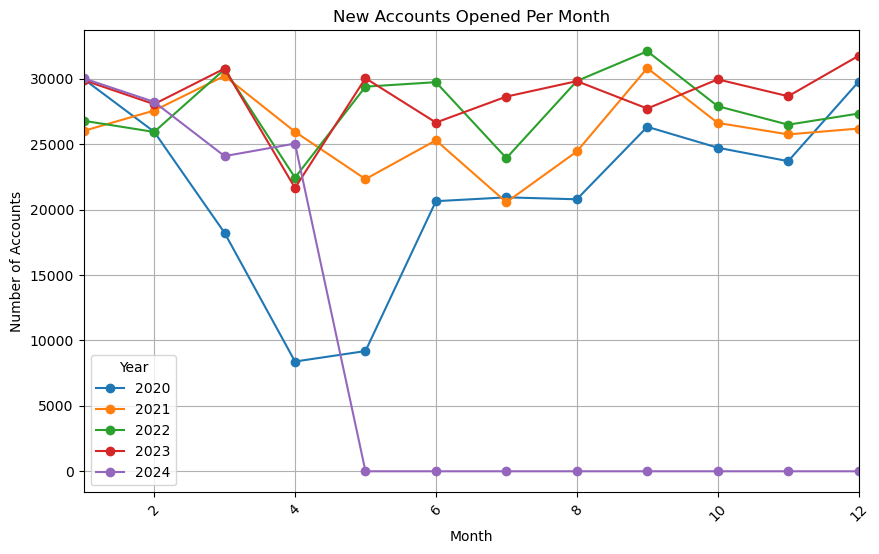

In [11]:
# Group by Year and Month to count new accounts
monthly_accounts = df_filtered.groupby(['Year', 'Month'])['RADICAL'].count().unstack(level=0, fill_value=0)

# Plot
plt.figure(figsize=(10, 6))
plt.title('New Accounts Opened Per Month')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.xlim(1,12)
plt.grid(True)
plt.ylabel('Number of Accounts')

# Plot a separate line for each year
for year in monthly_accounts.columns:
    plt.plot(monthly_accounts.index, monthly_accounts[year], marker='o', label=str(year))
plt.legend(title='Year')
plt.show()

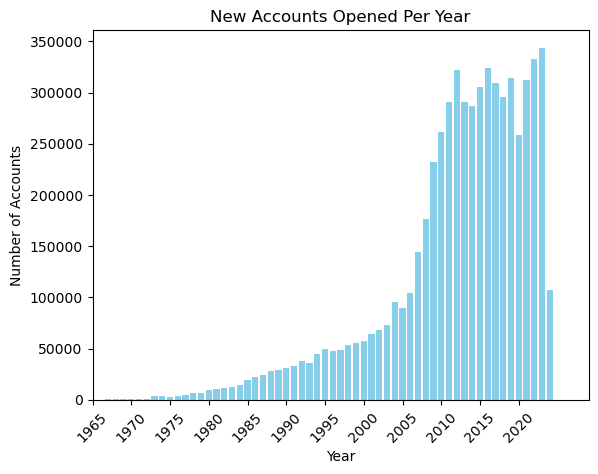

In [12]:
yearly_accounts = comptes.groupby('Year')['RADICAL'].count()

plt.bar(yearly_accounts.index, yearly_accounts.values, color='skyblue')
plt.title('New Accounts Opened Per Year')
plt.xlabel('Year')
year_ticks = yearly_accounts.index[yearly_accounts.index.astype(float) % 5 == 0]
plt.xticks(year_ticks.astype(str), rotation=45)
plt.xlim('1965','2025')
plt.ylabel('Number of Accounts')
plt.show()

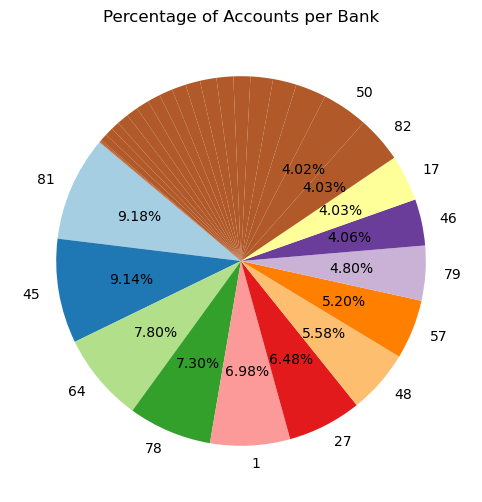

In [88]:
# Count the number of accounts per bank
bank_counts = comptes['BANQUE'].value_counts()

def autopct(pct): # only show the label when it's > 1%
    return ('%.2f%%' % pct) if pct > 4 else ''

percentages = bank_counts / bank_counts.sum() * 100
labels = [f'{name}' if percent > 4 else '' for name, percent in zip(bank_counts.index, percentages)]


my_labels = ('81', '45', '64', '78', '1', '27', '48', '57', '79', '46', '17', '82', '50')
colors = ['skyblue', 'lightblue', 'aliceblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'steelblue', 
          'darkblue','mediumblue']

# Plotting the Pie Chart
plt.figure(figsize=(14, 6))

# Pie chart
plt.subplot(1, 2, 1)
plt.pie(bank_counts, labels=labels, autopct=autopct, colors=plt.cm.Paired(range(len(bank_counts))), startangle=140)
plt.title('Percentage of Accounts per Bank')
#plt.legend(loc=2, labels=my_labels)
plt.show()
